In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/drawndata1.csv")

In [3]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [11]:
X = df[['x','y']].values
y = df['z'] == "a"
print(X[3])
print(y)

[262.00436148 284.25144485]
0      True
1      True
2      True
3      True
4      True
       ... 
247    True
248    True
249    True
250    True
251    True
Name: z, Length: 252, dtype: bool


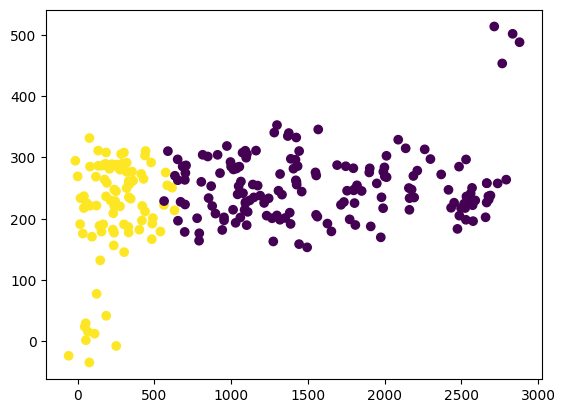

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Scaling:

StandardScaler

Calculate for each column -> mean, variance

(X- mean(X))/sqrt(variance) % scale values to around 0


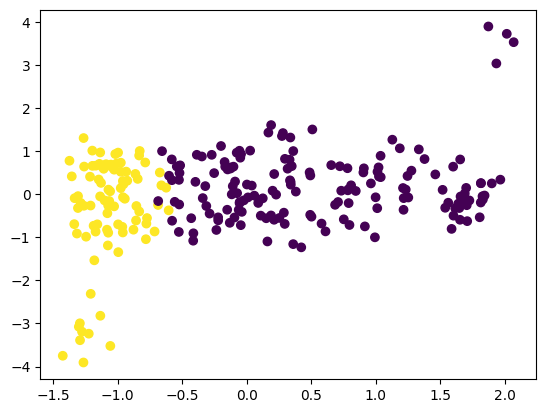

In [13]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);


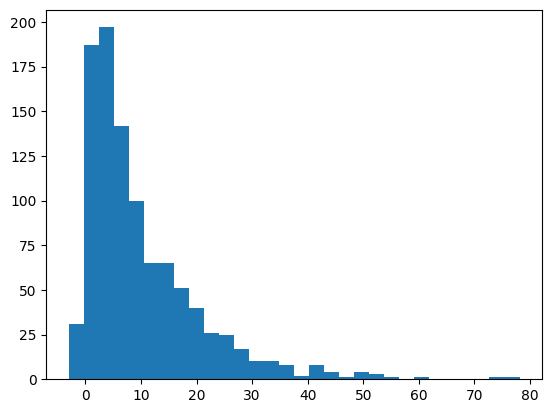

In [17]:
# artificial data to illustrate problems with StandardScaler

x = np.random.exponential(10, (1000)) + np.random.normal(0, 1, (1000))

plt.hist(x, 30);

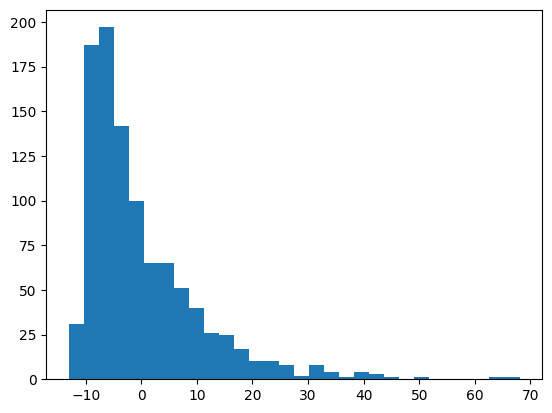

In [18]:
plt.hist((x - np.mean(x)), 30);

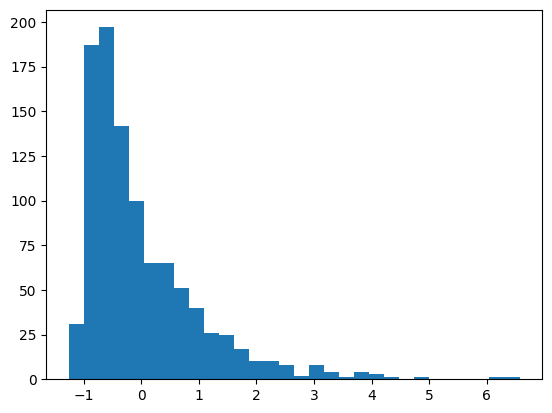

In [19]:
plt.hist((x - np.mean(x))/np.std(x), 30);

There is always outliers and skewness that StandardScaler could not fix

We can use the idea of quantiles to bring the data closer together so that outliers become much less of a problem

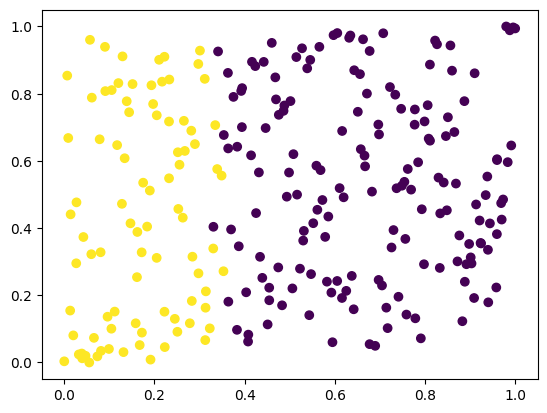

In [24]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

# Function to deal with the plotting

In [25]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

Effect of StandardScaler

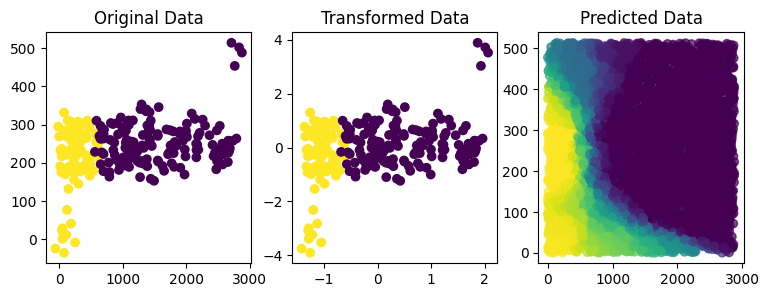

In [26]:
plot_output(scaler=StandardScaler())

Effect of QuantileTransformer

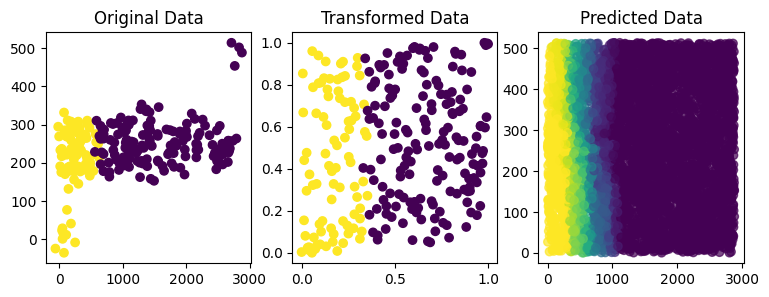

In [27]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

Combine QuantileTransformer with a GridSearchCV to verify the results. It will give a more stable result, since the outliers will not effect much now.

# New Dataset

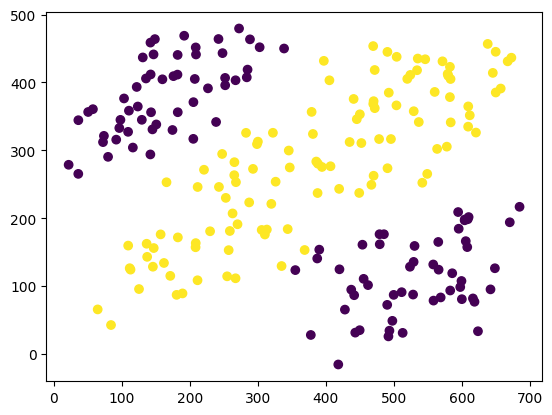

In [32]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

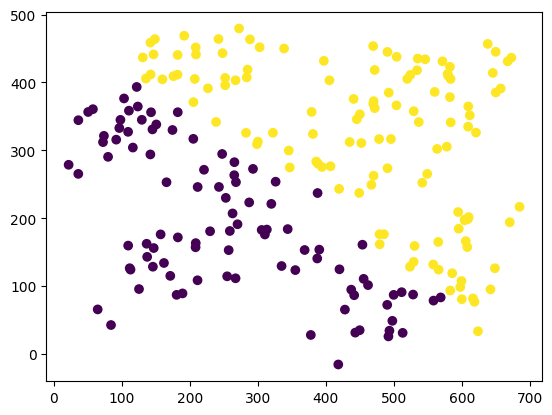

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

LogisticRegression with QuantileTransformer is not giving proper results if we compare the above result plot with original plot

So what we can do is to transform the linear features into non-linear features using PolynomialFeatures 

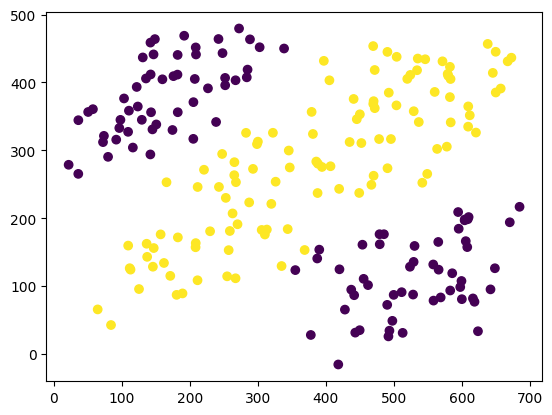

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

Now we can see the model predicts almost exactly the same as the original data (Though we are cheating here by using Training data to test)

# **One Hot Encoding**

In [35]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit_transform(arr)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [38]:
enc.transform([["zero"]])

array([[0., 0., 0.]])